In [5]:
import yfinance as yf
import pandas as pd

# Fetching Apple's stock data for 2022
aapl = yf.Ticker("AAPL")
data_2022 = aapl.history(start="2022-01-01", end="2023-01-01")

# Extracting the closing price at the end of each month
monthly_closing_prices = data_2022['Close'].resample('M').last()

# Displaying the monthly closing prices
print(monthly_closing_prices)


Date
2022-01-31 00:00:00-05:00    172.805542
2022-02-28 00:00:00-05:00    163.462677
2022-03-31 00:00:00-04:00    172.857452
2022-04-30 00:00:00-04:00    156.067673
2022-05-31 00:00:00-04:00    147.562592
2022-06-30 00:00:00-04:00    135.546600
2022-07-31 00:00:00-04:00    161.115250
2022-08-31 00:00:00-04:00    156.087173
2022-09-30 00:00:00-04:00    137.204224
2022-10-31 00:00:00-04:00    152.235123
2022-11-30 00:00:00-05:00    147.207169
2022-12-31 00:00:00-05:00    129.207779
Freq: M, Name: Close, dtype: float64


In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as si
import pytz

# Function to calculate option price using Black-Scholes model
def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        option_price = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    else:
        option_price = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))

    return option_price

# Fetching Apple's stock closing price data for 2022
aapl = yf.Ticker("AAPL")
data_2022 = aapl.history(start="2022-01-01", end="2023-01-01")['Close']

# Setting up parameters for the Black-Scholes model
r = 0.12  # Risk-free interest rate (assumed)
sigma = data_2022.pct_change().dropna().std() * np.sqrt(252)  # Annualized volatility

# Monthly forecasting using Black-Scholes
bs_monthly_forecasts = {}
timezone = pytz.timezone('America/New_York')  # Set the timezone

for month_end in pd.date_range(start="2022-12-31", end="2022-12-31", freq='M'):
    # Convert month_end to the same timezone as the data
    month_end_tz = timezone.localize(month_end)

    # Current stock price at month-end
    S = data_2022.loc[data_2022.index <= month_end_tz][-1]
    K = S  # Assuming at-the-money option
    T = (month_end_tz - pd.Timestamp("2022-01-01", tz='America/New_York')) / pd.Timedelta(days=365)
    N = 100  # Number of steps


In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as si
import pytz

# Fetching Apple's stock data
aapl = yf.Ticker("AAPL")
data_2022 = aapl.history(start="2022-01-01", end="2023-01-01")['Close']

# Common parameters
timezone = pytz.timezone('America/New_York')
date_range = pd.date_range(start="2022-01-31", end="2022-12-31", freq='M')

# Scenario parameters
scenario = {"r": 0.12, "sigma": data_2022.pct_change().dropna().std() * np.sqrt(252)}

# Define different strike prices for calls (Kc) and puts (Kp)
strike_prices = [S * 1.03, S * 1.05, S * 1.08]  # 3%, 5%, and 8% above the stock price

# Dictionary to hold forecasts for each strike price
forecasts = {f"Kc={int(100*strike_percent)}%_Kp={int(100*strike_percent)}%": {"call": {}, "put": {}} for strike_percent in [0.03, 0.05, 0.08]}

# Calculate forecasts for each strike price
for strike_percent in [0.03, 0.05, 0.08]:
    Kc = S * (1 + strike_percent)  # Call strike price
    Kp = S * (1 - strike_percent)  # Put strike price

    for month_end in date_range:
        month_end_tz = timezone.localize(month_end)
        S = data_2022.loc[data_2022.index <= month_end_tz][-1]
        T = (month_end_tz - pd.Timestamp("2022-01-01", tz='America/New_York')) / pd.Timedelta(days=365)
        
        # Calculate call option price
        call_option_price = black_scholes(S, Kc, T, scenario["r"], scenario["sigma"], option_type="call")
        forecasts[f"Kc={int(100*strike_percent)}%_Kp={int(100*strike_percent)}%"]["call"][month_end_tz.strftime('%Y-%m')] = call_option_price
        
        # Calculate put option price
        put_option_price = black_scholes(S, Kp, T, scenario["r"], scenario["sigma"], option_type="put")
        forecasts[f"Kc={int(100*strike_percent)}%_Kp={int(100*strike_percent)}%"]["put"][month_end_tz.strftime('%Y-%m')] = put_option_price

black_scholes_forecasts = forecasts
forecasts


{'Kc=3%_Kp=3%': {'call': {'2022-01': 41.046889017440435,
   '2022-02': 33.397479904090645,
   '2022-03': 44.14980799706949,
   '2022-04': 30.597312142848168,
   '2022-05': 25.582924056737255,
   '2022-06': 18.67360009647213,
   '2022-07': 40.37202368073392,
   '2022-08': 37.79460687576268,
   '2022-09': 24.76577153719512,
   '2022-10': 37.79868993976663,
   '2022-11': 35.26907149906543,
   '2022-12': 23.595806263562494},
  'put': {'2022-01': 0.0024122284841837927,
   '2022-02': 0.16989391006026144,
   '2022-03': 0.22108917738586342,
   '2022-04': 1.3528217499170765,
   '2022-05': 2.872466974747905,
   '2022-06': 5.779337175938899,
   '2022-07': 2.1539231818745765,
   '2022-08': 3.0532786425551492,
   '2022-09': 6.638549089065005,
   '2022-10': 4.21721471241359,
   '2022-11': 5.2824619473460785,
   '2022-12': 9.454637024904827}},
 'Kc=5%_Kp=5%': {'call': {'2022-01': 38.50394546046317,
   '2022-02': 31.052146925056647,
   '2022-03': 41.80544916670871,
   '2022-04': 28.62105974257763,
   

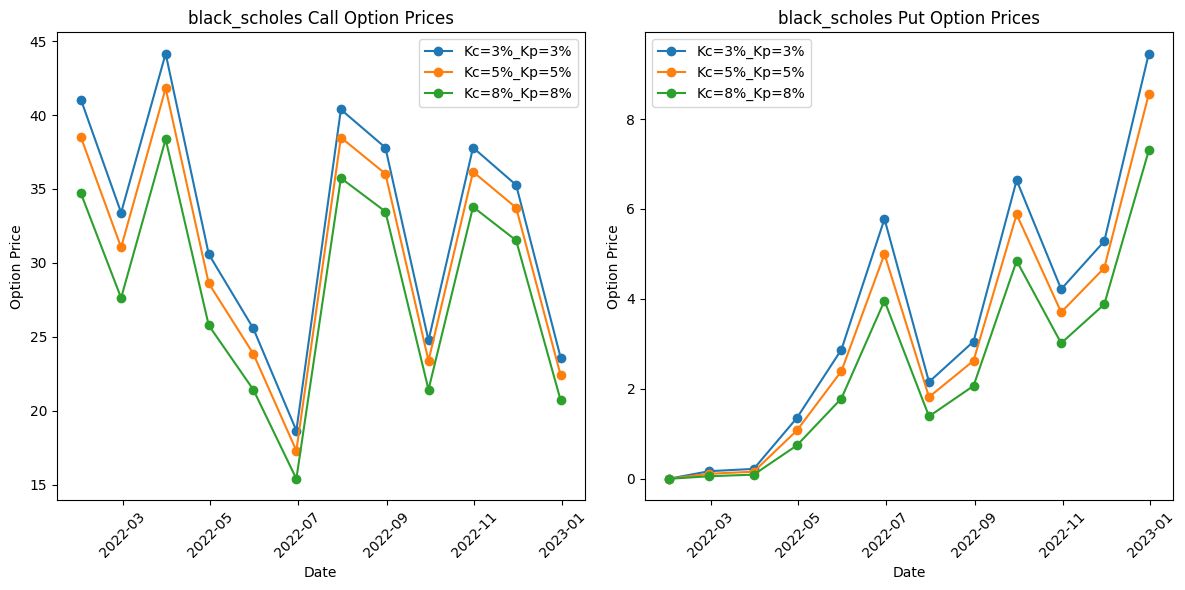

In [9]:
import matplotlib.pyplot as plt
# Add 'put' data to the 'forecasts' dictionary for each scenario

# Extract data for plotting (Call Options)
call_3 = list(forecasts['Kc=3%_Kp=3%']['call'].values())
call_5 = list(forecasts['Kc=5%_Kp=5%']['call'].values())
call_8 = list(forecasts['Kc=8%_Kp=8%']['call'].values())

# Extract data for plotting (Put Options)
put_3 = list(forecasts['Kc=3%_Kp=3%']['put'].values())
put_5 = list(forecasts['Kc=5%_Kp=5%']['put'].values())
put_8 = list(forecasts['Kc=8%_Kp=8%']['put'].values())

# Dates for x-axis
dates = list(forecasts['Kc=3%_Kp=3%']['call'].keys())
# Create two separate line charts for call and put options
plt.figure(figsize=(12, 6))

# Line chart for Call Options
plt.subplot(1, 2, 1)
plt.plot(date_range, call_3, label='Kc=3%_Kp=3%', marker='o')
plt.plot(date_range, call_5, label='Kc=5%_Kp=5%', marker='o')
plt.plot(date_range, call_8, label='Kc=8%_Kp=8%', marker='o')
plt.title('black_scholes Call Option Prices')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Option Price')
plt.legend()

# Line chart for Put Options
plt.subplot(1, 2, 2)
plt.plot(date_range, put_3, label='Kc=3%_Kp=3%', marker='o')
plt.plot(date_range, put_5, label='Kc=5%_Kp=5%', marker='o')
plt.plot(date_range, put_8, label='Kc=8%_Kp=8%', marker='o')
plt.title('black_scholes Put Option Prices')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Option Price')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import pytz

# Function to calculate option price using the binomial model
def binomial_option_prices(S, K, T, r, sigma, N):
    dt = T / N  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Upward movement factor
    d = 1 / u  # Downward movement factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    # Initializing asset price at maturity
    asset_prices = np.zeros(N + 1)
    asset_prices[0] = S * d**N

    for i in range(1, N + 1):
        asset_prices[i] = asset_prices[i - 1] * u / d

    # Calculating option values at maturity
    call_option_values = np.maximum(asset_prices - K, 0)
    put_option_values = np.maximum(K - asset_prices, 0)

    # Discounting back to the present value
    for i in range(N, 0, -1):
        call_option_values = (p * call_option_values[1:i + 1] + (1 - p) * call_option_values[0:i]) * np.exp(-r * dt)
        put_option_values = (p * put_option_values[1:i + 1] + (1 - p) * put_option_values[0:i]) * np.exp(-r * dt)

    return call_option_values[0], put_option_values[0]

# Fetching Apple's stock closing price data for 2022
aapl = yf.Ticker("AAPL")
data_2022 = aapl.history(start="2022-01-01", end="2023-01-01")['Close']

# Setting up parameters for the binomial model
r = 0.12  # Risk-free interest rate (assumed)
sigma = data_2022.pct_change().dropna().std() * np.sqrt(252)  # Annualized volatility
timezone = pytz.timezone('America/New_York')  # Set the timezone
N = 100  # Number of steps

# Preparing the forecast structure
strike_percentages = [0.03, 0.05, 0.08]  # Different strike percentages
forecasts = {f"Kc={int(100*sp)}%_Kp={int(100*sp)}%": {"call": {}, "put": {}} for sp in strike_percentages}

# Calculate forecasts for each strike price
for month_end in pd.date_range(start="2022-01-01", end="2022-12-31", freq='M'):
    month_end_tz = timezone.localize(month_end)
    S = data_2022.loc[data_2022.index <= month_end_tz][-1]
    T = (month_end_tz - pd.Timestamp("2022-01-01", tz='America/New_York')) / pd.Timedelta(days=365)

    for strike_percent in strike_percentages:
        Kc = S * (1 + strike_percent)  # Call strike price
        Kp = S * (1 - strike_percent)  # Put strike price

        call_price, _ = binomial_option_prices(S, Kc, T, r, sigma, N)
        _, put_price = binomial_option_prices(S, Kp, T, r, sigma, N)

        key = f"Kc={int(100*strike_percent)}%_Kp={int(100*strike_percent)}%"
        forecasts[key]["call"][month_end_tz.strftime('%Y-%m')] = call_price
        forecasts[key]["put"][month_end_tz.strftime('%Y-%m')] = put_price

binomia_forecasts = forecasts
forecasts


{'Kc=3%_Kp=3%': {'call': {'2022-01': 5.546207959134695,
   '2022-02': 8.46011783905126,
   '2022-03': 12.104216594810568,
   '2022-04': 13.369456501501727,
   '2022-05': 14.816172530477356,
   '2022-06': 15.409605068474924,
   '2022-07': 20.401156256244604,
   '2022-08': 21.68456617345756,
   '2022-09': 20.62534972536525,
   '2022-10': 24.610575447468968,
   '2022-11': 25.359677094657002,
   '2022-12': 23.629448749291786},
  'put': {'2022-01': 4.038534484420379,
   '2022-02': 5.623388419018408,
   '2022-03': 7.434430994863571,
   '2022-04': 7.706507308683458,
   '2022-05': 8.05685516782223,
   '2022-06': 7.96068364273164,
   '2022-07': 10.035962345990614,
   '2022-08': 10.191116643593952,
   '2022-09': 9.297949244661071,
   '2022-10': 10.650725538380442,
   '2022-11': 10.568565903806658,
   '2022-12': 9.486994278427106}},
 'Kc=5%_Kp=5%': {'call': {'2022-01': 4.284166104966756,
   '2022-02': 7.156331002950988,
   '2022-03': 10.64221549884516,
   '2022-04': 11.980050488893989,
   '2022-0

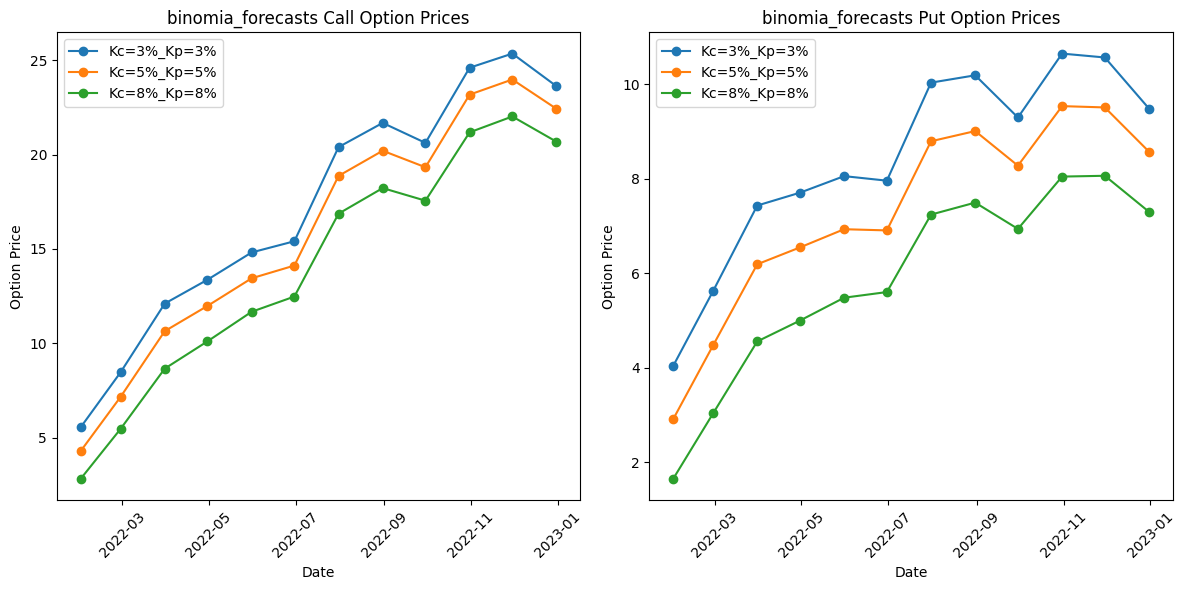

In [11]:
import matplotlib.pyplot as plt
# Add 'put' data to the 'forecasts' dictionary for each scenario
# Extract data for plotting (Call Options)
call_3 = list(forecasts['Kc=3%_Kp=3%']['call'].values())
call_5 = list(forecasts['Kc=5%_Kp=5%']['call'].values())
call_8 = list(forecasts['Kc=8%_Kp=8%']['call'].values())

# Extract data for plotting (Put Options)
put_3 = list(forecasts['Kc=3%_Kp=3%']['put'].values())
put_5 = list(forecasts['Kc=5%_Kp=5%']['put'].values())
put_8 = list(forecasts['Kc=8%_Kp=8%']['put'].values())

# Dates for x-axis
dates = list(forecasts['Kc=3%_Kp=3%']['call'].keys())
# Create two separate line charts for call and put options
plt.figure(figsize=(12, 6))

# Line chart for Call Options
plt.subplot(1, 2, 1)
plt.plot(date_range, call_3, label='Kc=3%_Kp=3%', marker='o')
plt.plot(date_range, call_5, label='Kc=5%_Kp=5%', marker='o')
plt.plot(date_range, call_8, label='Kc=8%_Kp=8%', marker='o')
plt.title('binomia_forecasts Call Option Prices')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Option Price')
plt.legend()

# Line chart for Put Options
plt.subplot(1, 2, 2)
plt.plot(date_range, put_3, label='Kc=3%_Kp=3%', marker='o')
plt.plot(date_range, put_5, label='Kc=5%_Kp=5%', marker='o')
plt.plot(date_range, put_8, label='Kc=8%_Kp=8%', marker='o')
plt.title('binomia_forecasts Put Option Prices')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Option Price')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:

months = []
for i in range(2, 13):
    month_str = str(i) if i >= 10 else "0" + str(i)
    
    months.append(month_str)
for month in months:
    full_key = "[Kc=3%_Kp=3%']['call']['2022-" + month + '\']'
    print(full_key)


[Kc=3%_Kp=3%']['call']['2022-02']
[Kc=3%_Kp=3%']['call']['2022-03']
[Kc=3%_Kp=3%']['call']['2022-04']
[Kc=3%_Kp=3%']['call']['2022-05']
[Kc=3%_Kp=3%']['call']['2022-06']
[Kc=3%_Kp=3%']['call']['2022-07']
[Kc=3%_Kp=3%']['call']['2022-08']
[Kc=3%_Kp=3%']['call']['2022-09']
[Kc=3%_Kp=3%']['call']['2022-10']
[Kc=3%_Kp=3%']['call']['2022-11']
[Kc=3%_Kp=3%']['call']['2022-12']


In [15]:
import pandas as pd

# 1. Create a list of months
months = []
for i in range(2, 13):
    month_str = str(i) if i >= 10 else "0" + str(i)
    months.append(month_str)

# 2. Calculate the strike prices
current_stock_price = monthly_closing_prices['2022-01'].values[0]
execution_percentages = [0.03, 0.05, 0.08]
call_strike_prices = [current_stock_price * (1 + p) for p in execution_percentages]
put_strike_prices = [current_stock_price * (1 - p) for p in execution_percentages]

# Iterate through each month to calculate results for each strategy
for month in months:
    # 3. Execute strategies
    low_strike_call = binomia_forecasts['Kc=3%_Kp=3%']['call']['2022-' + month]
    high_strike_call = binomia_forecasts['Kc=8%_Kp=8%']['call']['2022-' + month]
    middle_strike_calls = [
        binomia_forecasts['Kc=5%_Kp=5%']['call']['2022-' + month],
        binomia_forecasts['Kc=5%_Kp=5%']['call']['2022-' + month]
    ]

    low_strike_put = binomia_forecasts['Kc=3%_Kp=3%']['put']['2022-' + month]
    high_strike_put = binomia_forecasts['Kc=8%_Kp=8%']['put']['2022-' + month]
    middle_strike_puts = [
        binomia_forecasts['Kc=5%_Kp=5%']['put']['2022-' + month],
        binomia_forecasts['Kc=5%_Kp=5%']['put']['2022-' + month]
    ]

    butterfly_cost_call = high_strike_call + low_strike_call - 2 * sum(middle_strike_calls)
    butterfly_cost_put = high_strike_put + low_strike_put - 2 * sum(middle_strike_puts)

    call_option_price = binomia_forecasts['Kc=5%_Kp=5%']['call']['2022-' + month]
    put_option_price = binomia_forecasts['Kc=5%_Kp=5%']['put']['2022-' + month]
    straddle_cost = call_option_price + put_option_price

    # 4. Calculate profits/losses
    closing_price_at_end_of_month = monthly_closing_prices['2022-' + month].values[0]

    butterfly_profit_call = max(closing_price_at_end_of_month - call_strike_prices[0], 0) + max(closing_price_at_end_of_month - call_strike_prices[2], 0) - max(closing_price_at_end_of_month - call_strike_prices[1], 0) - butterfly_cost_call
    butterfly_profit_put = max(closing_price_at_end_of_month - put_strike_prices[0], 0) + max(closing_price_at_end_of_month - put_strike_prices[2], 0) - max(closing_price_at_end_of_month - put_strike_prices[1], 0) - butterfly_cost_put
    straddle_profit_or_loss = max(closing_price_at_end_of_month - call_strike_prices[1], 0) - straddle_cost

    # 5. Print the results
    print(f"Results for the month of {month}:")
    print("Profit from Butterfly Options Strategy (Call Options):", butterfly_profit_call)
    print("Profit from Butterfly Options Strategy (Put Options):", butterfly_profit_put)
    print("Profit/Loss from Straddle Options Strategy:", straddle_profit_or_loss)
    print()


Results for the month of 02:
Profit from Butterfly Options Strategy (Call Options): 14.705415401638753
Profit from Butterfly Options Strategy (Put Options): 13.720807872684617
Profit/Loss from Straddle Options Strategy: -11.630380061817373

Results for the month of 03:
Profit from Butterfly Options Strategy (Call Options): 21.809967282211495
Profit from Butterfly Options Strategy (Put Options): 23.192086662755344
Profit/Loss from Straddle Options Strategy: -16.83315438907687

Results for the month of 04:
Profit from Butterfly Options Strategy (Call Options): 24.44869802456045
Profit from Butterfly Options Strategy (Put Options): 13.486004484675624
Profit/Loss from Straddle Options Strategy: -18.527923788670975

Results for the month of 05:
Profit from Butterfly Options Strategy (Call Options): 27.29586217403432
Profit from Butterfly Options Strategy (Put Options): 14.192576684218668
Profit/Loss from Straddle Options Strategy: -20.37853059520285

Results for the month of 06:
Profit from

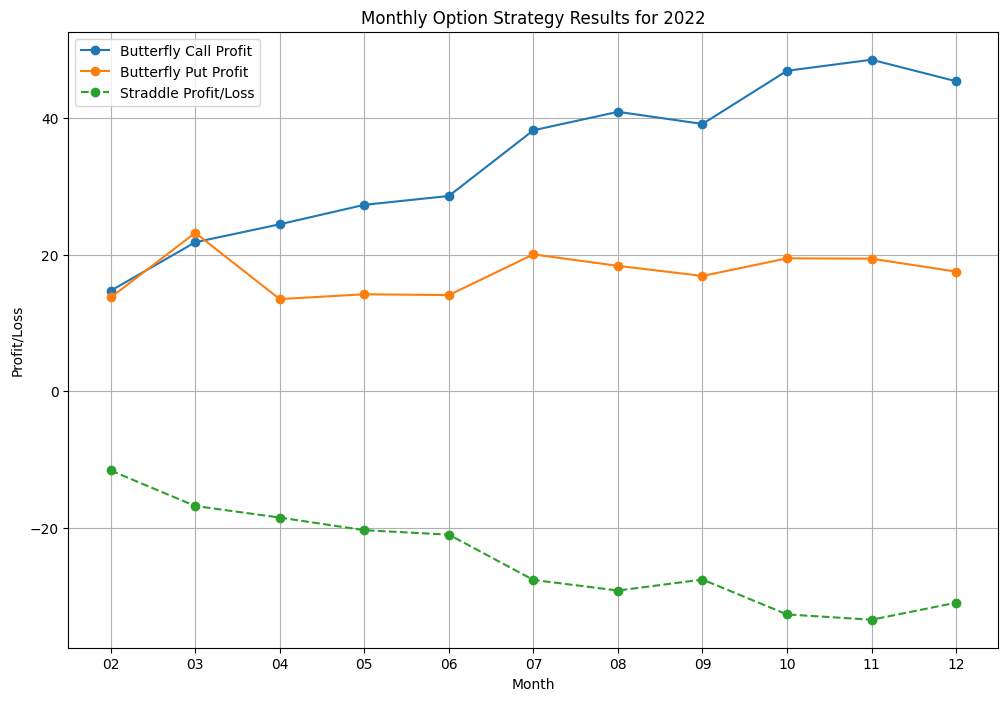

In [19]:
import matplotlib.pyplot as plt

# Data
months = ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
butterfly_call_profit = [14.705415401638753, 21.809967282211495, 24.44869802456045, 27.29586217403432, 28.59539851831414, 38.22104586436586, 40.92542897070216, 39.148924460353214, 46.94001094299571, 48.55941557677134, 45.40311273300463]
butterfly_put_profit = [13.720807872684617, 23.192086662755344, 13.486004484675624, 14.192576684218668, 14.067949937810978, 20.03538804339939, 18.355392703991697, 16.874768149843252, 19.456999457620768, 19.411336853196392, 17.508797904943727]
straddle_profit_loss = [-11.630380061817373, -16.83315438907687, -18.527923788670975, -20.37853059520285, -21.028245007386424, -27.668280029482922, -29.220211804435298, -27.61178424569824, -32.722332056635445, -33.49704481289955, -31.00395987595909]

# Plot
plt.figure(figsize=(12, 8))
plt.plot(months, butterfly_call_profit, label='Butterfly Call Profit', marker='o')
plt.plot(months, butterfly_put_profit, label='Butterfly Put Profit', marker='o')
plt.plot(months, straddle_profit_loss, label='Straddle Profit/Loss', marker='o', linestyle='--')

# Customizing the plot
plt.title('Monthly Option Strategy Results for 2022')
plt.xlabel('Month')
plt.ylabel('Profit/Loss')
plt.grid(True)
plt.legend()
plt.xticks(months)

# Show plot
plt.show()

